## Реализация LU разложения без перестановок

In [1]:
import numpy as np

# LU-factorization without pivoting
n = 5
A = np.random.rand(n,n)
U = np.copy(A) 
L = np.eye(n)
for k in range(n-1):
    for j in range(k+1,n):
        L[j,k] =   U[j,k] / U[k,k]
        U[j,k:n] = U[j,k:n] - L[j,k] * U[k, k:n]

print('A = \n', A, '\n') 
print('L = \n', L, '\n')
print('U = \n', U, '\n')
print('A - L @ U = \n', A - L @ U, '\n')

A = 
 [[0.24194444 0.19563249 0.30405943 0.65023164 0.04003259]
 [0.38977577 0.36542451 0.8394701  0.36190829 0.13536652]
 [0.6528674  0.51663003 0.36458382 0.75459615 0.06763198]
 [0.43762278 0.3670557  0.08466622 0.60327726 0.59758728]
 [0.39579936 0.1682792  0.54647634 0.10457692 0.11894557]] 

L = 
 [[ 1.          0.          0.          0.          0.        ]
 [ 1.61101352  1.          0.          0.          0.        ]
 [ 2.69841863 -0.22421007  1.          0.          0.        ]
 [ 1.80877384  0.26266034  1.47584769  1.          0.        ]
 [ 1.6359101  -3.01958305 -2.92654363 -4.8901113   1.        ]] 

U = 
 [[ 0.24194444  0.19563249  0.30405943  0.65023164  0.04003259]
 [ 0.          0.05025792  0.34962626 -0.68562368  0.07087348]
 [ 0.          0.         -0.37750607 -1.15372476 -0.02450215]
 [ 0.          0.          0.          1.30996345  0.54272317]
 [ 0.          0.          0.          0.          2.84973432]] 

A - L @ U = 
 [[ 0.00000000e+00  0.00000000e+00  0.00

## LU разложение с перестановками с помощью готовой функции

In [2]:
# LU-factorization with pivoting
from scipy import linalg as scpla
n = 4
A = np.random.rand(n,n)
P, L, U = scpla.lu(A)
print('P = \n', P)
print('A - P @ L @ U = \n', A - P @ L @ U)

P = 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
A - P @ L @ U = 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Решение задачи регрессии методом наименьших квадратов
Для решения переопределенной системы используется QR разложение

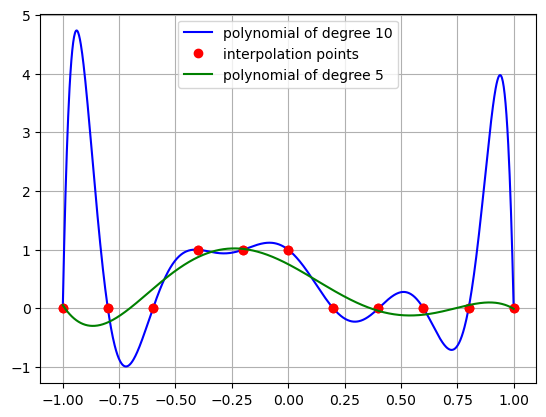

In [3]:
# Метод наименьших квадратов
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
m = 11
xx = np.linspace(-1, 1, m)
yy = np.array([0, 0, 0, 1., 1., 1, 0, 0, 0, 0, 0 ])
n = 11
# Создаем матрицу Вандермонда
A = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        A[i,j] = xx[i]**j
        
Q, R = np.linalg.qr(A)
v = Q.T @ yy
c = np.linalg.inv(R) @ v

plt.plot(xx, yy, 'ro')
x = np.linspace(-1,1, 1000)
plt.plot(x, np.polyval(c[::-1],x), 'b-', label  = 'polynomial of degree ' + str(n-1))

n = 6
# Создаем матрицу Вандермонда
A = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        A[i,j] = xx[i]**j
        
Q, R = np.linalg.qr(A)
v = Q.T @ yy
c = np.linalg.inv(R) @ v
plt.plot(xx, yy, 'ro', label = 'interpolation points')
x = np.linspace(-1,1, 1000)
plt.plot(x, np.polyval(c[::-1],x), 'g-', label  = 'polynomial of degree ' + str(n-1))
plt.legend()
plt.grid(True)